이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [1]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [2]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

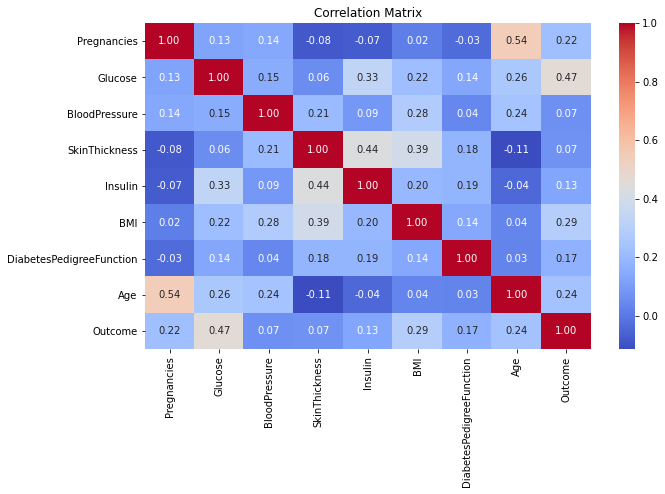

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 3. KNN 구현 & 파라미터 튜닝


In [7]:
knn_clf = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')

In [8]:
X = df.loc[:, df.columns != 'Outcome']
y= df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
knn_clf.fit(X_train, y_train)

# 예측 수행
y_pred = knn_clf.predict(X_test)

## 4. 평가

In [11]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6493506493506493


In [12]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors': range(2, 6), 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

# GridSearchCV 설정
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid,scoring='accuracy')

# 최적 하이퍼파라미터 찾기
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 따른 성능
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {grid_search.best_score_}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.732933493269359


In [13]:
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred_best)}")

Test Set Accuracy: 0.6688311688311688


In [14]:
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric = 'manhattan')

In [15]:
knn_clf.fit(X_train, y_train)

# 예측 수행
y_pred = knn_clf.predict(X_test)

In [16]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6753246753246753


---
# 2. K-Means 과제

## 1. 데이터 로드

In [17]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [19]:
df = df.dropna(axis=1, how='all')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [20]:
label_encoder = LabelEncoder()

In [21]:
columns_to_encode = [
    'status_id',
    'status_type',
    'status_published'
]

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

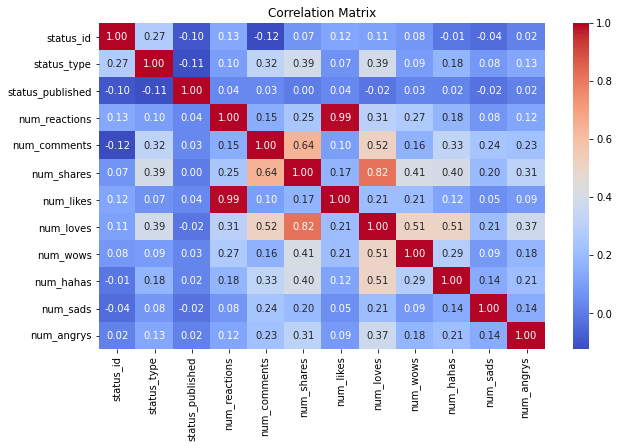

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 3. K-Means 구현 & 파라미터 튜닝

In [23]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df) # init='k-means++' 가 default 로 적용

In [24]:
y_kmeans = kmeans.predict(df)

## 4. 평가

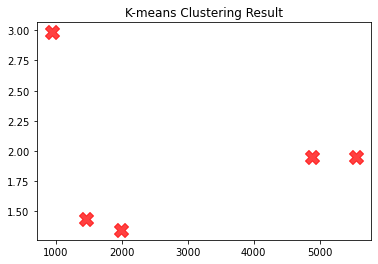

In [25]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering Result")
plt.show()

In [26]:
sil_score = silhouette_score(df, y_kmeans)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.396
